# Исследование объявлений о продаже квартир


## Изучение данных из файла

In [428]:
#выгружаем данные
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')


In [429]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Для большего удобство выведем также строки этой таблицы.

In [430]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,...,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,...,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,...,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,...,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,...,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,...,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,...,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,...,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,...,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,...,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


Название столбца  cityCenters_nearest можно было бы переименовать.
Имеются пропуски данных в столбцах.
Некоторые столбцы имеют неудобные форматы для работы. К примеру, стобец first_day_exposition можно перевести в 'datatime'. Столбец balcony и floors_total можно перевести в целые числа и т.д. 
На первый взгляд, каких то явных артефактов или каких то выбросов значений данных не обнаружено в целом не считая пропусков первые строки выгляд нормально.

In [431]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

In [432]:
#проверим явные дубликаты
data.duplicated().sum()

0

In [433]:
#изучим данные методом describe()
pd.set_option('display.float_format', '{:,.2f}'.format)
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


Видны странные значение в разных колонках. В колонке rooms минимальное значение комнат 0, чего не может быть. А максимальное отражает 19 комнат. Возможно такие квартиры и существуют, но думаю вряд ли они подходят для нашего анализа. В целом по данной колонке очень сильное значение стнадартного отклонения, по которому сразу ясно что есть сильные выбросы. Аналогично и с колонками living_area, ceiling_height, kitchen_area максимальное и минимальное значения сильно вызывают сомнения, у living_area тоже сильное стнадартное отклонение.
Данный метод странно подсчитал значения для колонки last_price, даже количество строк получило странную запись. Для данной колонки выделю хотя бы максимальное и минимальное значение отдельно.


In [434]:
print(data['last_price'].min())
data['last_price'].max()

12190.0


763000000.0

Явных ошибок тут нет. Однако данные значения могут сигнализировать о наличие выбросов.

### Вывод

Изучение данных помогло выявить следующие моменты:
- Имеются пропуски данных
- Некоторые колонки можно преобразовать в другой тип данных для удобства, также упростить их значеня(к примеру, колонку цен перевести в тысячи и т. п.)
- Были замечаны выбросы значений или значения нехарактерные для тех или иных параметров.

## Предобработка данных

### Работа с пропусками

In [435]:
# оценим количество пропусков в столбце locality_name
data['locality_name'].isna().sum()/len(data)

0.002067597788936242

In [436]:
# строками с этими пропусками можно пренебречь уберем их из таблицы
data = data.dropna(subset=['locality_name']).reset_index(drop=True)

In [437]:
# пропуски в колонке is_apartment скорее всего значат, что это тоже не апартаменты
data['is_apartment'] = data['is_apartment'].fillna(False)

In [438]:
# Пропуски в колонке balcony скорее всего вызване тем, что люди из-за отсутсвия балкона не стали заполнять этт параметр
#Поэтому можем заменить значения в столбце на 0
data['balcony'] = data['balcony'].fillna(0)

In [439]:
#высоту полотков вряд ли сгруппируешь по предложенным критериям про легче произвести замену по медиане столбца. 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#с количесвтом этажей сложнее однако пропусков совсем немного, незначительное число. 
data['floors_total'].isna().sum()/len(data)



0.003594080338266385

In [440]:
# строками с этими пропусками можно пренебречь уберем их из таблицы
data = data.dropna(subset=['floors_total']).reset_index(drop=True)

In [441]:
# заменим пропуски по площадям, но сначала созданим колонки соотношения по долям между общей площадь с жилой и кухонной зоной
data['living_to_total'] = data['living_area']/data['total_area']*100
data['kitchen_to_total'] = data['kitchen_area']/data['total_area']*100

In [442]:
# теперь построим сводную таблицу содержащее медиану по долям в зависимости от комнат
data_area = data.pivot_table(index='rooms', values=['living_area','kitchen_area'], aggfunc='median')
#пропишем функцию замены для этих пропусков
def replace_living(row):
    if pd.isna(row['living_area']):
        return (data_area.loc[row['rooms'], 'living_area'])*row['total_area']/100
    return row['living_area']

data['living_area']  = data.apply(replace_living, axis=1)

def replace_kitchen(row):
    if pd.isna(row['kitchen_area']):
        return (data_area.loc[row['rooms'],'kitchen_area'])*row['total_area']/100
    return row['kitchen_area']

data['kitchen_area']  = data.apply(replace_kitchen, axis=1)

In [443]:
# проверим медианы
data.pivot_table(index='rooms', values=['living_area','kitchen_area'], aggfunc='median')

,kitchen_area,living_area
rooms,,
0,nan,18.00
1,9.00,17.40
2,8.30,30.00
3,9.00,44.10
4,11.00,64.00
5,16.00,95.00
6,20.00,126.50
7,20.12,151.40
8,27.70,161.00


In [444]:
# для площадь кухонь с 0 комнаты таких данных не было, 
#однако недвижимость без комнат это ошибочные данные, которыми можно пренебречь
data = data.dropna(subset=['kitchen_area']).reset_index(drop=True)

In [445]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23371 entries, 0 to 23370
Data columns (total 24 columns):
total_images            23371 non-null int64
last_price              23371 non-null float64
total_area              23371 non-null float64
first_day_exposition    23371 non-null object
rooms                   23371 non-null int64
ceiling_height          23371 non-null float64
floors_total            23371 non-null float64
living_area             23371 non-null float64
floor                   23371 non-null int64
is_apartment            23371 non-null bool
studio                  23371 non-null bool
open_plan               23371 non-null bool
kitchen_area            23371 non-null float64
balcony                 23371 non-null float64
locality_name           23371 non-null object
airports_nearest        17924 non-null float64
city_centers_nearest    17947 non-null float64
parks_around3000        17948 non-null float64
parks_nearest           8002 non-null float64
ponds_around3000

Пропусков подходящих для замены больше не обнаружено.

### Изменение типов данных

In [446]:
#переведем столбец first_day_exposition в пригодный для работы с датами формат, оставив только одну дату часы нам не понадобятся
data['first_day_exposition'] =pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

In [447]:
# переведем ряд столбцов в целые числа отбрасив десятичные дроби, 
#там где они не столь сущесвтенные или не логичны совсем, цены и метры также заодно упростим до тысяч или километров
data['last_price'] = (data['last_price']/1000).astype('int')

data['floors_total'] = data['floors_total'].astype('int')
data['balcony'] = data['balcony'].astype('int')

# расстояние для удобства переведем в километры 
data['city_centers_nearest'] = data['city_centers_nearest']/1000


In [448]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23371 entries, 0 to 23370
Data columns (total 24 columns):
total_images            23371 non-null int64
last_price              23371 non-null int64
total_area              23371 non-null float64
first_day_exposition    23371 non-null datetime64[ns]
rooms                   23371 non-null int64
ceiling_height          23371 non-null float64
floors_total            23371 non-null int64
living_area             23371 non-null float64
floor                   23371 non-null int64
is_apartment            23371 non-null bool
studio                  23371 non-null bool
open_plan               23371 non-null bool
kitchen_area            23371 non-null float64
balcony                 23371 non-null int64
locality_name           23371 non-null object
airports_nearest        17924 non-null float64
city_centers_nearest    17947 non-null float64
parks_around3000        17948 non-null float64
parks_nearest           8002 non-null float64
ponds_around30

Типы данных необходимых для анализа стали нагляднее и легче для восприятия и работы с ними. 

## Расчёты и добавление результатов в таблицу

In [449]:
# добавим соотношения по площадям уже было добавлено ранее
#добавляем колонку с ценой квадратного метра
data['price_for_metr']=data['last_price']/data['total_area']
#добавляем в таблицу день недели, год и месяц
data['weekday'] = pd.DatetimeIndex(data['first_day_exposition']).weekday
data['month'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year
#добавляем группировку по этажам
def group_floor(row):
    if row['floors_total'] == row['floor']:
        if row['floor'] == 1:
            return 'первый'  
        else:
            return 'последний'
    return 'другой'
data['group_floor']=data.apply(group_floor, axis=1)

In [450]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total,price_for_metr,weekday,month,year,group_floor
0,20,13000,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2.00,755.00,nan,47.22,23.15,120.37,3,3,2019,другой
1,7,3350,40.40,2018-12-04,1,2.65,11,18.60,1,False,...,0.00,nan,81.00,46.04,27.23,82.92,1,12,2018,другой
2,10,5196,56.00,2015-08-20,2,2.65,5,34.30,4,False,...,2.00,574.00,558.00,61.25,14.82,92.79,3,8,2015,другой
3,0,64900,159.00,2015-07-24,3,2.65,14,71.55,9,False,...,3.00,234.00,424.00,nan,nan,408.18,4,7,2015,другой
4,2,10000,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1.00,48.00,121.00,32.00,41.00,100.00,1,6,2018,другой
5,10,2890,30.40,2018-09-10,1,2.65,12,14.40,5,False,...,nan,nan,55.00,47.37,29.93,95.07,0,9,2018,другой
6,6,3700,37.30,2017-11-02,1,2.65,26,10.60,6,False,...,0.00,nan,155.00,28.42,38.61,99.20,3,11,2017,другой
7,5,7915,71.60,2019-04-18,2,2.65,24,21.84,22,False,...,0.00,nan,nan,nan,26.40,110.54,3,4,2019,другой
8,20,2900,33.16,2018-05-23,1,2.65,27,15.43,26,False,...,nan,nan,189.00,46.53,26.57,87.45,2,5,2018,другой
9,18,5400,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0.00,nan,289.00,71.48,10.66,88.52,6,2,2017,другой


Необходимые расчеты произведены. Данные успешно добавлены в таблицу. Теперь можно переходить к исследовательскому анализу

## Исследовательский анализ данных

### Предварительный анализ параметров

Ранее мы уже находили минимальное и максимальное значение для цены. Разброс цен большой от 12 000 до 783 000 000. Возможно в данном параметры имеют выбросы. Для того чтобы лучше разобраться выведем среднюю и медиану по цене.

In [451]:
print(data['last_price'].mean())
data['last_price'].median()

6566.56895297591


4650.0

Медиана и средняя сильно отличаются почти что в 2 млн. рублей такие данные явно не будут пригодны для полноценного анализа нужно будет избавится отвыбросов. В целом 4,6 млн за недвижимость похоже на правду. Касательно других параметров то их выбросы были замечены еще в первой разделе проекта, когда использовался метод describe(). Высота потолков варьируется от 1 метра до 100 метров, к примеру. С площадью пока что менее очевидно есть ли там сущесвтенные выбросы, хотя площадь в 900 м2 слишком большая даже для ангаров. Касательно комнат посчитаем значения для наглядности.

In [452]:
data['rooms'].value_counts()

1     8004
2     7897
3     5779
4     1172
5      325
6      104
7       59
8       12
9        8
10       3
14       2
11       2
15       1
12       1
19       1
16       1
Name: rooms, dtype: int64

В этих данных не так все критично. Слишком больших значений мало в общей выборке. 0 комнат тоже немного. Для интереса выгрузим строку с самым большим количеством комнат.

In [453]:
data.query('rooms ==rooms.max()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total,price_for_metr,weekday,month,year,group_floor
14302,6,32250,374.60,2018-06-09,19,2.65,5,264.50,2,False,...,2.00,548.00,114.00,70.61,7.37,86.09,5,6,2018,другой


В целом глядя на параметры, это выглядит как возможное реальное предложение, к примеру, сдача гостиницы в жилом доме, для более точного понимания пригодились данные целей сдач и и тп., однако для этого исследования это явный выброс. Выгружать и изучать таким образом строки будет долгий процесс, поэтому соберем изучаемые параметры в одну таблицу и посчитаем для них матрицы корреляции и матрицу распределения. Можно еще добавить  и соотношения площадей.

In [454]:
data_for_corr = data[['last_price', 'rooms', 'ceiling_height', 'total_area', 'living_to_total', 'kitchen_to_total']]
display(data_for_corr.corr())

,last_price,rooms,ceiling_height,total_area,living_to_total,kitchen_to_total
last_price,1.00,0.36,0.07,0.65,0.01,-0.09
rooms,0.36,1.00,0.05,0.76,0.51,-0.59
ceiling_height,0.07,0.05,1.00,0.08,0.01,0.01
total_area,0.65,0.76,0.08,1.00,0.15,-0.32
living_to_total,0.01,0.51,0.01,0.15,1.00,-0.72
kitchen_to_total,-0.09,-0.59,0.01,-0.32,-0.72,1.00


Взаимосвязи данных в принципе вышли вполне ожидаемые или имеют разумное обьяснение:
- Цена сильнее зависит от площади и высоты помещений, чем от числа комнат. Обьясняется тем, что в выгружке недвижимость не только для жилья выставляется. Плюс нужно учитывать возможность свободной планировки, что позволяет отдавать предпочтения количеству метров в первую очередь.
- Комнаты имеют хорошую положительную корреляцию с площадью. что в вполне логично.
- А вот площадь и высота практически не имеют связи между собой, что скорее всего правда ведь люди не могут как цену корректировать эти параметры. Поэтому данные в разнобой, в отличие от тех же комнат, которые как правило зависят от площади.
- У соотношений площадей практически отсутвует корреляция со многими параметрами. Выявляется отрицательная корреляция между числом комнат и кухонной зоной, что логично так как кухня все равно будет одна, как правило, на разное число комнат, тоже самое касается и взаимосвязи с общей площадью и жилой. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdef474a690>,
      dtype=object)

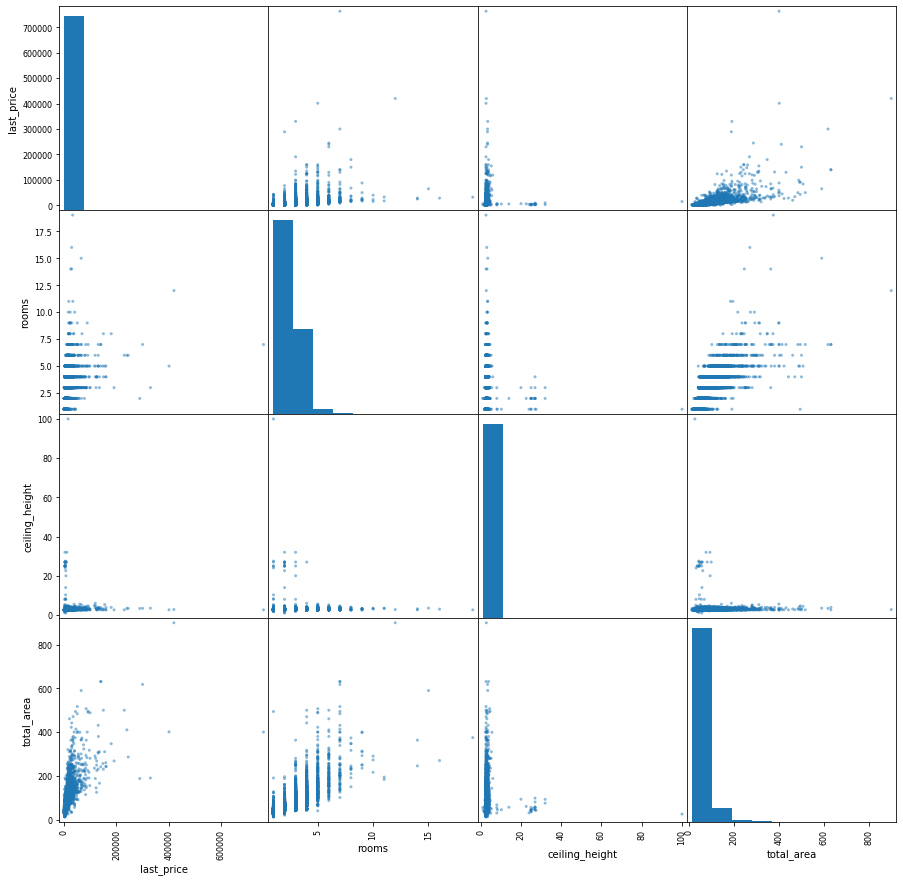

In [455]:
#строим матрицу распределения убрав из таблицы соотношения площадей, они будут лишнимим и перегрузят матрицу
data_for_matrix =data[['last_price', 'rooms', 'ceiling_height', 'total_area']]
pd.plotting.scatter_matrix(data_for_matrix, figsize=(15,15))

Судя по характеру гистограмм в данных очень много выбосов больших значений, однако в целом данные имеют нормальное распределение четко прослеживается центральные значения гистограмм параметров. 
- Расределение цены и комнат идет на рост, чем больше комнат тем дороже, однако после комнат 6 цена за комнату идет на спад. Основная цена до 10 млн. по предложениям.
- Площади и цена растут равномерно, чем больше цена тем больше площадь
- Почти половину данных высоты потолков мы меняли ранее на медиану в виду отсутствия значений, поэтому ее распределение похоже на линию. Конечно, это повлияло на данные, но лучшей замены все равно не было и в целом медиана по своему значению подходила.


### Изучение времени продажи квартиры

Время продажи квартир находится в столбце days_exposition. Найдем медиану, среднее и построим гистограмму.


181.3684575046997
96.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdef413b850>]],
      dtype=object)

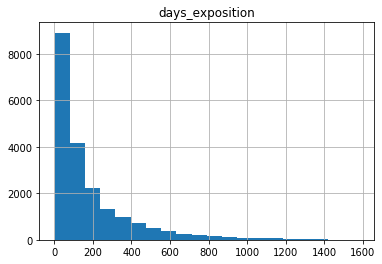

In [456]:
print(data['days_exposition'].mean())
print(data['days_exposition'].median())
data.hist('days_exposition', bins=20)

Медиана и средняя сильно отличаются. Значит в выборке есть много выбросов. Глядя на медиану видно что в целом обьявления висят примерно от 2-3 месяцев, что гистограмма тоже подтверждает. Глядя на гистограмму, значения свыше 400 дней можно взять как очень долгие. С быстрыми не особо пока ясно построем еще одну гистограмму, задав границы значений.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdef40597d0>]],
      dtype=object)

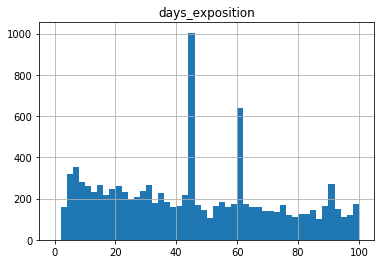

In [457]:
data.hist('days_exposition', bins=50, range=(0, 100))

На графике видны резкие скачки, но первое 0 значение было поставлено вручную при замене пропусков, исходя из того, что система считает количесвто дней я обьевления могли закрывать в тот же самый день, его можно убрать и посмотреть еще раз на гистограмму.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdef3f90c50>]],
      dtype=object)

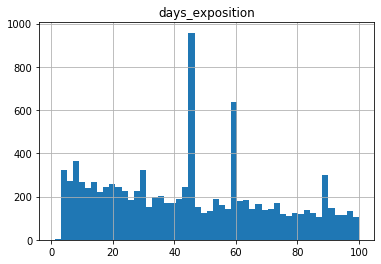

In [458]:
data.hist('days_exposition', bins=50, range=(1, 100))

Слишком коротких продаж теперь практически не стало, есть парочка продаж 1-2 дней, для чистоты данных их можно будет откинуть. Однако очень интересны два явных пика на гистограмме, пока их природа неясна. 

In [459]:
#Изучим пиковые значения, найдем количество дней в которые были пиковые значения
data.query('42<=days_exposition<=60')['days_exposition'].value_counts()

45.00    868
60.00    534
44.00    136
42.00    112
54.00    110
43.00    107
59.00    105
46.00     90
56.00     84
52.00     84
53.00     80
48.00     77
47.00     77
55.00     75
57.00     74
58.00     70
49.00     67
50.00     59
51.00     49
Name: days_exposition, dtype: int64

In [460]:
# убедимся, что это не одна какая-то сделка или аномалия, посчтиаем количесвто обьявлений по месяцам
display(data.query('days_exposition ==60').pivot_table(index=['year','month'], values='last_price', aggfunc='count'))
data.query('days_exposition ==45').pivot_table(index=['year','month'], values='last_price', aggfunc='count')

last_price
year month            
2016 4              11
     5               7
     6              14
     7               2
2017 1               2
     2               2
     4              17
     5              12
     6              10
     7               8
     8              11
     9              16
     10              8
     11             39
     12             63
2018 1              34
     2              50
     3              42
     4               5
     6              18
     7              46
     8              28
     9              17
     10             19
     11             16
     12              6
2019 1              14
     2              17

,
year,month


Видно, что эти пики разные сделки просто совпадение или возможно ккая то фирма выставляет обьевления по сроку реализации.
Подводя итог то в среднем размещения идут от 2-3 месяцев. Менее 3 дней принято считать для этой выборки очень быстрыми сделками, а сделки более 500 дней слишком долгими.

### Убираем редкие и выбивающиеся значения

In [461]:
#вовращаясь к матрице распределений убираем из таблицы редкие и странные значения. начнем с комнат
data_pured= data.query('1<=rooms<=6')
# высоту потолков я бы оставил от 2 м до 4 m
data_pured= data_pured.query('2<=ceiling_height<=4')
#теперь убирем редкие значения по площади исходя из гистограммы
data_pured= data_pured.query('total_area<=150')
# убирем орчень быстрые и очень долгие сделки
data_pured= data_pured.query('3<=days_exposition<=400')

In [462]:
#посмотрим на данные таблицы
data_pured.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total,price_for_metr,weekday,month,year
count,"17,263.00","17,263.00","17,263.00","17,263.00","17,263.00","17,263.00","17,263.00","17,263.00","17,263.00","17,263.00",...,"5,646.00","13,273.00","6,403.00","17,263.00","15,781.00","15,630.00","17,263.00","17,263.00","17,263.00","17,263.00"
mean,9.70,"5,385.92",54.86,1.96,2.68,10.97,30.20,6.01,9.49,0.60,...,490.09,0.72,531.00,110.80,56.09,19.10,95.65,2.59,6.58,"2,017.41"
std,5.65,"4,090.21",21.37,0.91,0.18,6.65,15.06,4.94,4.66,0.95,...,338.13,0.91,275.43,97.59,10.39,7.15,37.68,1.79,3.49,0.81
min,0.00,12.00,12.00,1.00,2.00,1.00,2.00,1.00,1.08,0.00,...,1.00,0.00,13.00,3.00,2.16,4.35,0.11,0.00,1.00,"2,015.00"
25%,6.00,"3,387.50",39.00,1.00,2.60,5.00,18.00,2.00,6.50,0.00,...,288.00,0.00,315.00,38.00,49.07,13.73,76.16,1.00,3.00,"2,017.00"
50%,9.00,"4,450.00",50.00,2.00,2.65,9.00,28.57,4.00,8.80,0.00,...,455.00,0.00,521.00,77.00,56.39,17.70,93.58,3.00,7.00,"2,017.00"
75%,14.00,"6,200.00",65.00,3.00,2.70,16.00,39.00,8.00,11.00,1.00,...,613.00,1.00,741.00,161.00,63.33,23.55,110.95,4.00,10.00,"2,018.00"
max,50.00,"124,000.00",150.00,6.00,4.00,60.00,131.86,33.00,93.00,5.00,...,"3,190.00",3.00,"1,344.00",400.00,98.34,78.79,995.98,6.00,12.00,"2,019.00"


Выборка сократилась примерно на 25% однако стала намного лучше. Во многих столбиках сократились стандартные отклонения, значит выбросов стало намного меньше. Однако по цене все еще велико отклонение построем отдельную гистограмму и определим выбросы.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdef3e4fa50>]],
      dtype=object)

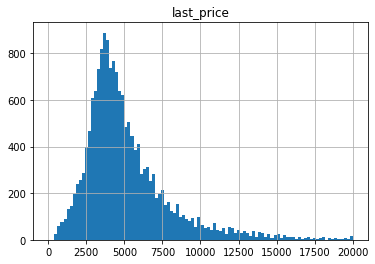

In [463]:
data_pured.hist('last_price', bins=100, range=(0,20000))

In [464]:
#уберем сделки с слишом большими ценами и маленькими ценами
data_pured= data_pured.query('1000<last_price<9000')
data_pured.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total,price_for_metr,weekday,month,year
count,"15,381.00","15,381.00","15,381.00","15,381.00","15,381.00","15,381.00","15,381.00","15,381.00","15,381.00","15,381.00",...,"4,626.00","11,580.00","5,353.00","15,381.00","14,104.00","13,942.00","15,381.00","15,381.00","15,381.00","15,381.00"
mean,9.53,"4,485.08",50.60,1.85,2.66,10.98,27.78,6.00,8.84,0.59,...,481.70,0.66,543.75,108.46,56.01,19.28,90.53,2.59,6.59,"2,017.42"
std,5.51,"1,692.89",16.11,0.85,0.15,6.62,12.40,4.92,3.58,0.92,...,316.45,0.85,274.87,96.72,10.35,7.05,26.56,1.79,3.49,0.81
min,0.00,"1,010.00",12.00,1.00,2.00,1.00,2.00,1.00,1.08,0.00,...,1.00,0.00,16.00,3.00,3.85,4.35,10.51,0.00,1.00,"2,015.00"
25%,6.00,"3,300.00",38.00,1.00,2.60,5.00,17.70,2.00,6.30,0.00,...,288.00,0.00,333.00,37.00,48.79,13.92,74.55,1.00,3.00,"2,017.00"
50%,9.00,"4,220.00",46.90,2.00,2.65,9.00,27.50,4.00,8.40,0.00,...,451.00,0.00,537.00,73.00,56.31,18.00,91.18,3.00,7.00,"2,017.00"
75%,13.00,"5,500.00",60.00,2.00,2.65,16.00,35.30,8.00,10.51,1.00,...,609.00,1.00,753.00,158.00,63.26,23.91,106.25,4.00,10.00,"2,018.00"
max,39.00,"8,999.00",146.00,6.00,4.00,60.00,110.14,31.00,64.00,5.00,...,"3,190.00",3.00,"1,344.00",400.00,97.33,78.79,292.31,6.00,12.00,"2,019.00"




Теперь данные выборки стали намного чище и более пригодны для анализа и выявления закономерностей.

### Изучение влияния параметров на цену квартиры

In [465]:
# По отчищенным данным изучим зависимость цены от комнат, площади, этажности, удалености от центра,  атакже в зависимости от времени размещения.
# Создадим спец таблицу для матрицы корреляции
data_pured_for_corr= data_pured[['last_price', 'rooms', 'total_area', 'living_to_total', 'kitchen_to_total', 'weekday', 'month', 'year', 'city_centers_nearest']]


In [466]:
#выводим матрицу кореляции
data_pured_for_corr.corr()

,last_price,rooms,total_area,living_to_total,kitchen_to_total,weekday,month,year,city_centers_nearest
last_price,1.00,0.41,0.64,0.04,-0.13,-0.00,0.01,0.02,-0.32
rooms,0.41,1.00,0.80,0.62,-0.67,0.00,-0.00,-0.05,-0.04
total_area,0.64,0.80,1.00,0.29,-0.45,0.00,0.01,-0.06,-0.05
living_to_total,0.04,0.62,0.29,1.00,-0.75,0.01,-0.02,-0.02,-0.02
kitchen_to_total,-0.13,-0.67,-0.45,-0.75,1.00,-0.00,0.01,0.04,-0.02
weekday,-0.00,0.00,0.00,0.01,-0.00,1.00,0.01,-0.00,0.01
month,0.01,-0.00,0.01,-0.02,0.01,0.01,1.00,-0.24,-0.02
year,0.02,-0.05,-0.06,-0.02,0.04,-0.00,-0.24,1.00,-0.00
city_centers_nearest,-0.32,-0.04,-0.05,-0.02,-0.02,0.01,-0.02,-0.00,1.00


- Касательно зависимость цены от комнат уже говорилось ранее что там не сильная зависимость
- По площади выводы тоже не изменились после отчситки данных
- По корреляции видно, что день, месяц или  год не имееют четкой взаимосвязи с ценой. Возможно цены растут, но на фоне разнообразия параметров и сделок выявить четкую взаимосвязь не получится, только если группировать однотипные предложения и смотреть их изменений сквозь года, что в данной выборке, учитывая что предложения в среднем живут по 2-3 месяца не представляется возможным, да и цены на рынке недвижимости имеют стихийную составляющую в плане их формирования.
- Касательно удалености то тут имеет место несильно выраженная отрицательная кореляция, значит чем меньше расстояние, тем цена становится дороже, что в целом звучит логично. 
Посмотрим влияет ли этаж на цены построим сводные таблицу и выделим медианы по ценам

In [467]:
data_pured.pivot_table(index='group_floor', values='last_price', aggfunc='median')

,last_price
group_floor,
другой,4299
первый,2990
последний,3950


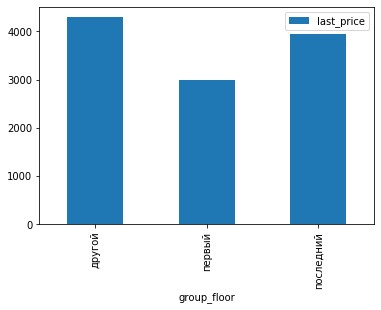

In [468]:
# Для наглядности построим график
data_pured.pivot_table(index='group_floor', values='last_price', aggfunc='median').plot(kind='bar')

Как и ожидалось квартиры на первом этаже стоят дешевле, чем на других этажах и последнем. Изучим цены в разрезе населенных пунктов.

In [469]:
top_locality= data_pured.pivot_table(index='locality_name', values='price_for_metr', aggfunc=['count', 'mean'])
top_locality.columns =['count', 'mean']
top_locality.sort_values('count', ascending=False).head(10)

                                    

,count,mean
locality_name,,
Санкт-Петербург,9732,102.50
посёлок Мурино,446,85.39
посёлок Шушары,362,77.61
Всеволожск,281,66.58
Колпино,278,74.48
посёлок Парголово,266,89.25
Пушкин,241,98.40
деревня Кудрово,241,91.93
Гатчина,228,68.28


Больше всего предложений сосредоточено в культурной столице, но там же и самая дорогая цена за квадратнй метр.
А вот Выборг пользуется куда меньшей популярностью, но и цена там гораздо ниже, чем в Питере. В целом по всей 10 цены примерно в одном диапозоне от 70 до 100 тысяч за метр. Причем нельзя однозначно выделить прямую зависимость от количесвта обьявлений. Там где обьявлений меньше не всегда цена тоже девешле, чем в соседних городах.

Как оказалось на цену в первую очередь вляет площадь, затем уже важными парметрами становятся количество комнат и удаленность от центра. Дата размещения практически не играет никакой роли. Больше всего обьявлений в Питере, что ожидаемо, цены между населенными пунктами разбросаны в одном диапозоне, у городов с меньшей популярностьюцена иногда выше.

### Выделение центрального сегмента картир в Питере

In [470]:
# отбираем данные по Питеру, столбец растояния и так уже в киллометрах, переводим в целое число
data_pured_piter = data_pured.query('locality_name == "Санкт-Петербург"')
#посмотрим сколько пропусков в столбце расстояния, чтобы произвести замену на целые числа 
data_pured_piter['city_centers_nearest'].isna().sum()/len(data_pured_piter)


0.0016440608302507192

In [471]:
#незначительное число избавимся от пропусков
data_pured_piter = data_pured_piter.dropna(subset=['city_centers_nearest']).reset_index(drop=True)

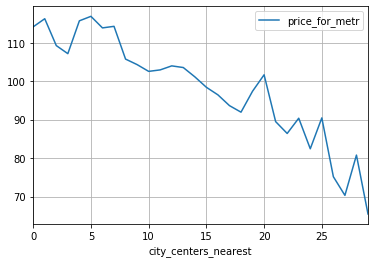

In [472]:
data_pured_piter['city_centers_nearest'] = data_pured_piter['city_centers_nearest'].astype('int')
data_pured_piter.pivot_table(index='city_centers_nearest', values='price_for_metr').plot(y='price_for_metr', grid=True)

На графике наглядно видно прямую зависимость от удаленности от центра. Хотя в определенных местах, есть всплески, тенденция идет к уменьшению цены. Центральную зонуможно выделить по 6 киллометр включительно, в связи с тем что это граница первого постоянного (то есть цены выше уже не поднималась) снижения цены.

### Анализ центрального сегмента

In [473]:
#создадим таблицу с датами центраьнго сегмента
data_pured_piter_center=data_pured_piter.query('city_centers_nearest <=6')
data_pured_piter_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_to_total,kitchen_to_total,price_for_metr,weekday,month,year
count,"1,156.00","1,156.00","1,156.00","1,156.00","1,156.00","1,156.00","1,156.00","1,156.00","1,156.00","1,156.00",...,753.00,"1,156.00",819.00,"1,156.00","1,071.00","1,045.00","1,156.00","1,156.00","1,156.00","1,156.00"
mean,9.43,"6,383.50",59.28,2.15,2.85,6.56,33.74,3.68,9.80,0.23,...,464.60,1.23,489.96,120.69,57.55,18.38,113.74,2.56,6.77,"2,017.33"
std,5.53,"1,547.28",19.61,0.91,0.30,3.48,15.19,2.48,4.08,0.61,...,311.68,1.07,270.90,103.05,11.15,7.66,28.78,1.72,3.38,0.85
min,0.00,"1,600.00",12.00,1.00,2.40,2.00,2.00,1.00,1.08,0.00,...,13.00,0.00,27.00,3.00,3.85,6.06,15.35,0.00,1.00,"2,015.00"
25%,6.00,"5,250.00",44.50,1.00,2.65,5.00,21.50,2.00,7.12,0.00,...,276.00,0.00,262.50,38.00,50.94,13.16,93.02,1.00,4.00,"2,017.00"
50%,9.00,"6,500.00",56.70,2.00,2.70,5.00,32.00,3.00,9.00,0.00,...,420.00,1.00,474.00,83.00,59.18,16.30,108.94,3.00,7.00,"2,017.00"
75%,13.00,"7,600.00",72.00,3.00,3.00,7.00,44.00,5.00,11.85,0.00,...,587.00,2.00,694.00,188.00,65.29,21.96,130.32,4.00,10.00,"2,018.00"
max,32.00,"8,999.00",138.70,5.00,4.00,25.00,95.00,21.00,36.60,5.00,...,"2,295.00",3.00,"1,199.00",400.00,97.22,56.05,292.31,6.00,12.00,"2,019.00"


Все показатели остались примерно такими же, однако выросла мелиана и средняя цены, что логично так как это более дорогой сегмент. Остальные параметры площади, высоты числа комнат примерно аналогичны другим выборкам.
Выделим другим факторы, которые оказывают влияние.

In [474]:
data_pured_piter_center_for_corr= data_pured_piter_center[['last_price', 'rooms', 'total_area', 'weekday', 'month', 'year', 'city_centers_nearest']]
data_pured_piter_center_for_corr.corr()

,last_price,rooms,total_area,weekday,month,year,city_centers_nearest
last_price,1.00,0.42,0.63,0.08,-0.00,0.05,-0.09
rooms,0.42,1.00,0.81,0.03,0.02,-0.05,-0.12
total_area,0.63,0.81,1.00,0.03,0.03,-0.09,-0.13
weekday,0.08,0.03,0.03,1.00,-0.00,0.03,-0.02
month,-0.00,0.02,0.03,-0.00,1.00,-0.23,-0.03
year,0.05,-0.05,-0.09,0.03,-0.23,1.00,0.06
city_centers_nearest,-0.09,-0.12,-0.13,-0.02,-0.03,0.06,1.00


Параметры оказывают аналогичное влияние на цену. Единственное снизилось влияние расстояния, что логично, так как это и была цель этой выборки отделить данный центрального сегмента, значит расстояние уже не имеет сильную корреляцию.

In [475]:
data_pured_piter_center.pivot_table(index='group_floor', values='last_price', aggfunc='median')


,last_price
group_floor,
другой,6500
последний,6500


Этажность перестала влиять на выборку. Очевидно это из-за того, что сама выборка содержит не очень большое число значений для данного параметра, также изначально не было сильной разницы между последним и другими этажами, учитывая, что первых этажей в выборке по центру не осталось.

Можно сказать, что выборка по центру обладает теме же зависимостями  и параметрами аналогично общей очищенной выборке. Единственные явные отличия снижения влияния расстояния на цену и рост средней цены.

## Общий вывод

Изучив данные можно сделать следующие выводы:
- Цена прежде всего зависит от площади обьекта, также весомое влияние оказывают расположение квартиры относительно центра и число комнат. Этажность также влияет, люди предпочитают недвижимость не на первом этаже.
- Четкой засимости между датами публикации и ценой нет.
- Квартиры в центре подчиняются тем же правилам, что и в остальных сегментах, только влияния на расположение к центру практически не оказывает влияния.